In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [12]:
pd.set_option('display.max_columns', 10, 'display.width', 1000)
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [13]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,...,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,...,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,...,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,...,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,...,0,373450,8.0500,NaN,S


In [14]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,...,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,...,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,...,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,...,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,...,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,...,1,3101298,12.2875,NaN,S


In [15]:
train.shape

(891, 12)

In [26]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [20]:
mean_age = train.Age.mean()

In [21]:
train["Age"].fillna(mean_age, inplace = True)

C:\Users\talka\AppData\Local\Temp\ipykernel_2988\777527349.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Age"].fillna(mean_age, inplace = True)


In [25]:
train["Embarked"].fillna(method = "ffill", inplace = True)

C:\Users\talka\AppData\Local\Temp\ipykernel_2988\837029506.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train["Embarked"].fillna(method = "ffill", inplace = True)


In [17]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [27]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [28]:
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,...,891.000000,891,891.000000,204,891
unique,NaN,NaN,NaN,891,2,...,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,...,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,...,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,...,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,...,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,...,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,...,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,...,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,...,0.000000,NaN,31.000000,NaN,NaN


In [29]:
grp1 = train.groupby("Survived")

In [30]:
grp1.size()

Survived
0    549
1    342
dtype: int64

In [31]:
grp1.mean(numeric_only=True)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.415100,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.549778,0.473684,0.464912,48.395408


In [32]:
getgrp1 = grp1.get_group(0)

In [33]:
getgrp1

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,...,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,...,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,...,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,...,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,...,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,...,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,...,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,...,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,...,2,W./C. 6607,23.4500,NaN,S


In [34]:
grp2 = train.groupby("Embarked")

In [35]:
grp2.mean(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,443.088757,0.556213,1.881657,30.606429,0.384615,0.360947,60.072759
Q,423.179487,0.397436,2.884615,29.535343,0.423077,0.166667,14.131465
S,449.527950,0.336957,2.350932,29.480855,0.571429,0.413043,27.079812


In [36]:
getgrp2 = grp2.get_group('S')

In [37]:
getgrp2

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,...,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,...,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,...,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,...,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,...,0,17463,51.8625,E46,S
...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,...,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,...,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,...,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,...,0,112053,30.0000,B42,S


In [38]:
corr_matrix = train.corr(numeric_only=True)

In [39]:
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


<Axes: >

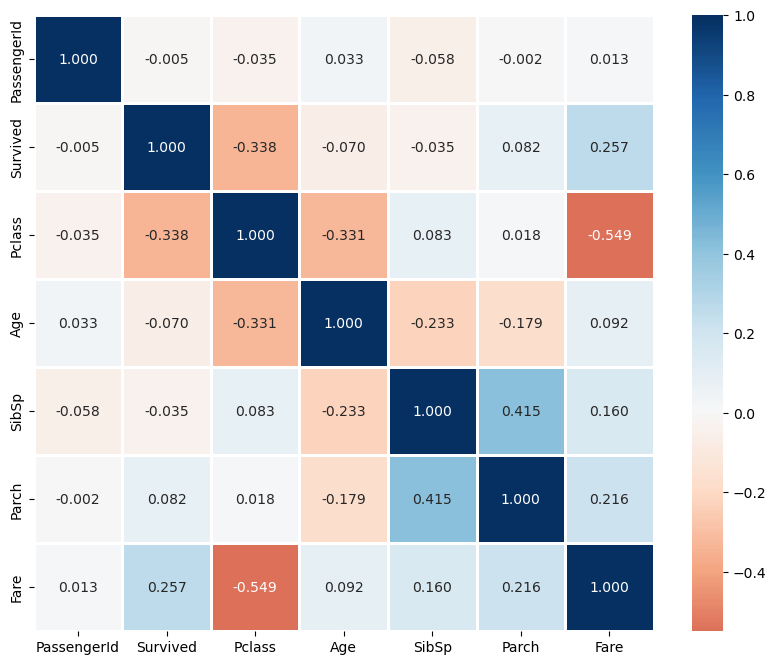

In [40]:
plt.figure(figsize=(10, 8))
sb.heatmap(corr_matrix,
            center=0,
            cmap='RdBu',
            annot=True,
            fmt='.3f',
            linewidths=.9)

In [41]:
total_males = len(train[train["Sex"]=='male'])
print("Total number of males :", total_males)

Total number of males : 577


In [42]:
total_females = len(train[train["Sex"]=='female'])
print("Total number of females :", total_females)

Total number of females : 314


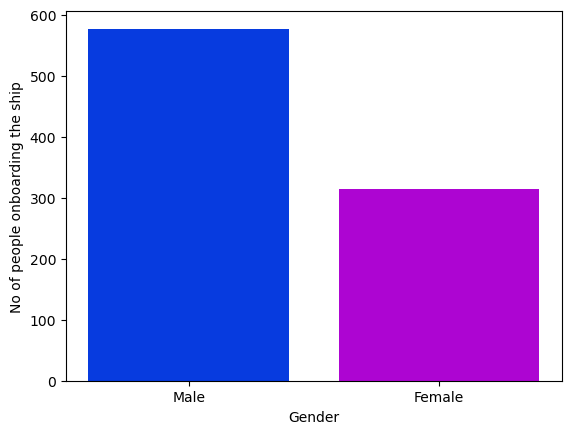

In [43]:
fig = plt.figure()
gender=["Male","Female"]
index=[577,314]
plt.bar(gender,index,color=['#073BDF','#AD05D2'])
plt.xlabel("Gender")
plt.ylabel("No of people onboarding the ship")
plt.show()

In [44]:
alive = len(train[train["Survived"]==1])
alive

342

In [45]:
dead = len(train[train["Survived"]==0])
dead

549

In [46]:
train.groupby("Sex")[["Survived"]].mean()

,Survived
Sex,
female,0.742038
male,0.188908


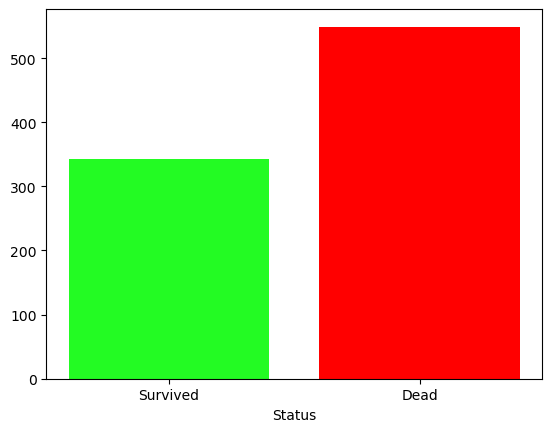

In [47]:
fig1 = plt.figure()
status = ['Survived', 'Dead']
ind = [alive, dead]
plt.bar(status, ind, color=['#23FB23','#FF0000'])
plt.xlabel("Status")
plt.show()

In [48]:
Pclass_survived = train.loc[train["Survived"] == 1, "Pclass"]

In [49]:
Pclass_survived_plot = Pclass_survived.value_counts().sort_index()
Pclass_survived_plot

Pclass
1    136
2     87
3    119
Name: count, dtype: int64

Text(0.5, 1.0, 'Bar graph of people according to ticket class in which people survived')

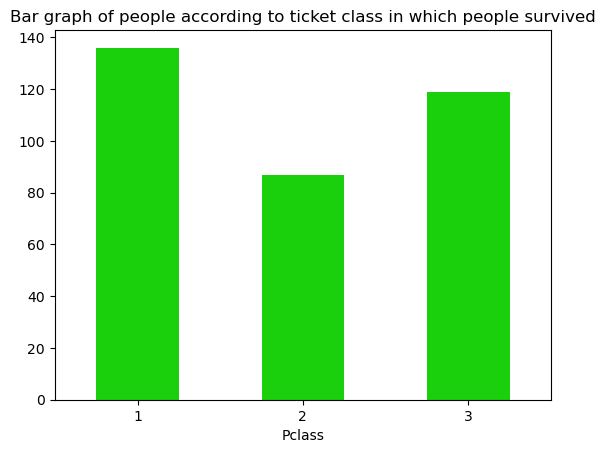

In [50]:
plt.figure()
Pclass_survived_plot.plot.bar(color=['#1ACF0B'])
plt.xticks(rotation=0)
plt.title("Bar graph of people according to ticket class in which people survived")

In [51]:
Pclass_notsurvived = train.loc[train["Survived"] == 0, "Pclass"]

In [52]:
Pclass_notsurvived_plot = Pclass_notsurvived.value_counts().sort_index()
Pclass_notsurvived_plot

Pclass
1     80
2     97
3    372
Name: count, dtype: int64

Text(0.5, 1.0, 'Bar graph of people according to ticket class in which people have not survived')

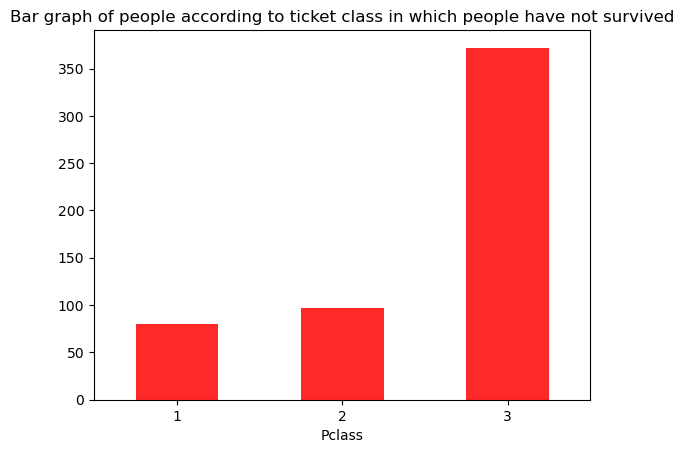

In [53]:
plt.figure()
Pclass_notsurvived_plot.plot.bar(color=['#FF2929'])
plt.xticks(rotation=0)
plt.title("Bar graph of people according to ticket class in which people have not survived")

In [54]:
age_survived = train.loc[train["Survived"] == 1, "Age"]
age_survived.value_counts().sort_index()

Age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
58.00    3
60.00    2
62.00    2
63.00    2
80.00    1
Name: count, Length: 66, dtype: int64

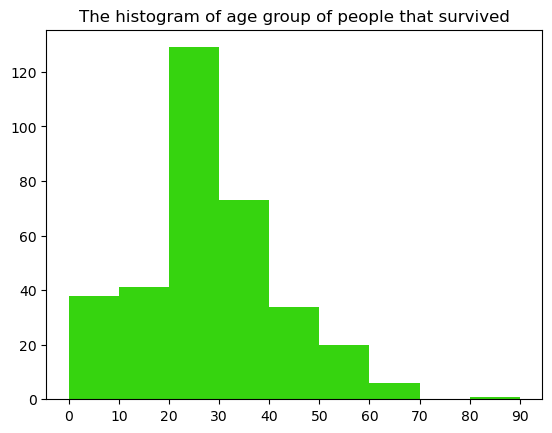

In [55]:
plt.figure()
plt.title("The histogram of age group of people that survived")
plt.hist(age_survived, np.arange(0,100,10), color=["#36D40F"])
plt.xticks(np.arange(0,100,10))
plt.show()

In [56]:
age_notsurvived = train.loc[train.Survived == 0, "Age"]
age_notsurvived

0      22.000000
4      35.000000
5      29.699118
6      54.000000
7       2.000000
         ...    
884    25.000000
885    39.000000
886    27.000000
888    29.699118
890    32.000000
Name: Age, Length: 549, dtype: float64

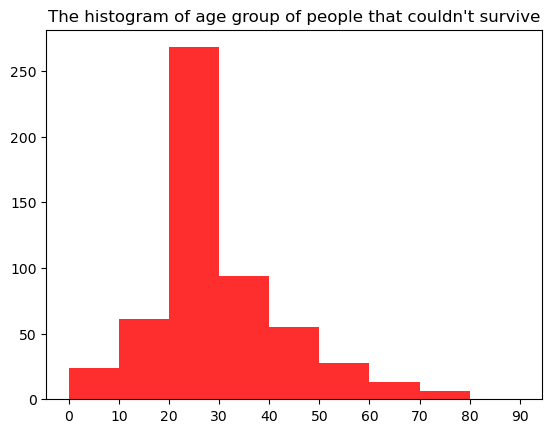

In [58]:
plt.figure()
plt.title("The histogram of age group of people that couldn't survive")
plt.hist(age_notsurvived, np.arange(0,100,10), color=["#FF2E2E"])
plt.xticks(np.arange(0,100,10))
plt.show()

In [59]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [94]:
train[['Age', 'Survived']].groupby(['Age'], as_index = False).mean().sort_values(by = 'Age', ascending = False)

,Age,Survived
87,80.00,1.0
86,74.00,0.0
85,71.00,0.0
84,70.50,0.0
83,70.00,0.0
...,...,...
4,0.92,1.0
3,0.83,1.0
2,0.75,1.0
1,0.67,1.0


In [95]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Embarked', ascending = False)

,Embarked,Survived
2,S,0.336957
1,Q,0.389610
0,C,0.553571


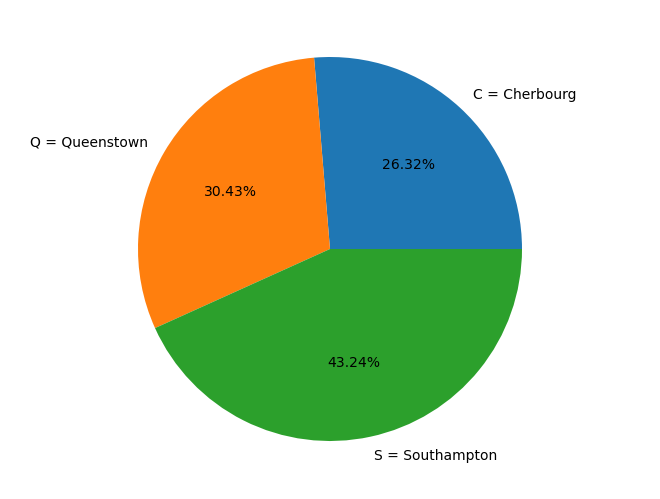

In [96]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['C = Cherbourg', 'Q = Queenstown', 'S = Southampton']
s = [0.336957, 0.389610, 0.553571]
ax.pie(s, labels = l, autopct = '%1.2f%%')
plt.show()

In [97]:
test.describe(include = 'all')

,PassengerId,Pclass,Name,Sex,Age,...,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,...,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,...,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,...,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,...,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,...,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,...,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,...,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,...,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,...,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,...,0.000000,NaN,31.500000,NaN,NaN


In [98]:
train = train.drop(['Ticket'], axis = 1) 
test = test.drop(['Ticket'], axis = 1) 

In [99]:
train = train.drop(['Cabin'], axis = 1) 
test = test.drop(['Cabin'], axis = 1) 

In [100]:
train = train.drop(['Name'], axis = 1) 
test = test.drop(['Name'], axis = 1) 

In [101]:
column_train = ['Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']
X = train[column_train]
Y = train['Survived']

In [102]:
X['Age'].isnull().sum()
X['Pclass'].isnull().sum()
X['SibSp'].isnull().sum()
X['Parch'].isnull().sum()
X['Fare'].isnull().sum()
X['Sex'].isnull().sum()
X['Embarked'].isnull().sum()

2

In [103]:
X['Age'] = X['Age'].fillna(X['Age'].median())
X['Age'].isnull().sum()

C:\Users\talka\AppData\Local\Temp\ipykernel_23772\8070389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'] = X['Age'].fillna(X['Age'].median())


0

In [104]:
X['Embarked'] = X['Embarked'].fillna(method = 'pad')
X['Embarked'].isnull().sum()

C:\Users\talka\AppData\Local\Temp\ipykernel_23772\936512066.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X['Embarked'] = X['Embarked'].fillna(method = 'pad')
C:\Users\talka\AppData\Local\Temp\ipykernel_23772\936512066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Embarked'] = X['Embarked'].fillna(method = 'pad')


0

In [105]:
d = {'male' : 0, 'female' :1}
X['Sex'] = X['Sex'].apply(lambda x:d[x])
X['Sex'].head()

C:\Users\talka\AppData\Local\Temp\ipykernel_23772\3794486211.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].apply(lambda x:d[x])


0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [106]:
e = {'C':0, 'Q':1, 'S':2}
X['Embarked'] = X['Embarked'].apply(lambda x:e[x])
X['Embarked'].head()

C:\Users\talka\AppData\Local\Temp\ipykernel_23772\2622437285.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Embarked'] = X['Embarked'].apply(lambda x:e[x])


0    2
1    0
2    2
3    2
4    2
Name: Embarked, dtype: int64

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 7)

In [108]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_Pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score is :", accuracy_score(Y_Pred, Y_test))

Accuracy Score is : 0.7574626865671642


C:\Users\talka\anaconda3\envs\nc\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [111]:
from sklearn.metrics import *
confusion_mat = confusion_matrix(Y_Pred, Y_test)
print(confusion_mat)

[[130  39]
 [ 26  73]]


In [112]:
from sklearn.svm import *
model1 = SVC()
model1.fit(X_train, Y_train)
m1pred = model1.predict(X_test)
print("Accuracy Score is :", accuracy_score(Y_test, m1pred))

Accuracy Score is : 0.6604477611940298


In [113]:
confusion_mat1 = confusion_matrix(Y_test, m1pred)
print(confusion_mat1)
print(classification_report(Y_test, m1pred))

[[149   7]
 [ 84  28]]
              precision    recall  f1-score   support

           0       0.64      0.96      0.77       156
           1       0.80      0.25      0.38       112

    accuracy                           0.66       268
   macro avg       0.72      0.60      0.57       268
weighted avg       0.71      0.66      0.61       268



In [120]:
from sklearn.neighbors import *
model2 = KNeighborsClassifier(n_neighbors = 5)
model2.fit(X_train, Y_train)
m2pred = model2.predict(X_test)
print("Accuracy Score is:", accuracy_score(Y_test, m2pred))

Accuracy Score is: 0.6604477611940298


In [121]:
confusion_mat2 = confusion_matrix(Y_test, m2pred)
print(confusion_mat2)
print(classification_report(Y_test, m2pred))

[[127  29]
 [ 62  50]]
              precision    recall  f1-score   support

           0       0.67      0.81      0.74       156
           1       0.63      0.45      0.52       112

    accuracy                           0.66       268
   macro avg       0.65      0.63      0.63       268
weighted avg       0.66      0.66      0.65       268



In [124]:
from sklearn.naive_bayes import *
model3 = GaussianNB()
model3.fit(X_train, Y_train)
m3pred = model3.predict(X_test)
print("Accuracy Score is:", accuracy_score(Y_test, m3pred))

Accuracy Score is: 0.7686567164179104


In [125]:
confusion_mat3 = confusion_matrix(Y_test, m3pred)
print(confusion_mat3)
print(classification_report(Y_test, m3pred))

[[129  27]
 [ 35  77]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       156
           1       0.74      0.69      0.71       112

    accuracy                           0.77       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [128]:
from sklearn.tree import *
model4 = DecisionTreeClassifier(random_state = 7, criterion = 'entropy')
model4.fit(X_train, Y_train)
m4pred = model4.predict(X_test)
print("Accuracy Score is:", accuracy_score(Y_test, m4pred))

Accuracy Score is: 0.7425373134328358


In [129]:
confusion_mat4 = confusion_matrix(Y_test, m4pred)
print(confusion_mat4)
print(classification_report(Y_test, m4pred))

[[132  24]
 [ 45  67]]
              precision    recall  f1-score   support

           0       0.75      0.85      0.79       156
           1       0.74      0.60      0.66       112

    accuracy                           0.74       268
   macro avg       0.74      0.72      0.73       268
weighted avg       0.74      0.74      0.74       268



In [134]:
results = pd.DataFrame({'Model' : ['Logistic Regression', 'Support Vector Machines', 'Naive Bayes', 'KNN', 'Decision tree'], 
                        'Score' : [0.75,0.66,0.76,0.66,0.74]})
results_df = results.sort_values(by = 'Score', ascending = False)
results_df = results_df.set_index('Score')
results_df.head()

,Model
Score,
0.76,Naive Bayes
0.75,Logistic Regression
0.74,Decision tree
0.66,Support Vector Machines
0.66,KNN
